# LINGMAP: Socio-Geographical Determinants for Philippine Language Similarity

**Abstract** This notebook explores linguistic diversity across Philippine regions using geographical and socio-demographic data.

| Author | Date | 
| ---    | --- |
| Zhean Robby Ganituen | October 7, 2025| 

**Table of Contents**
- [Socio-Geographical Determinants for Philippine Language Similarity](#socio-geographical-determinants-for-philippine-language-similarity)
  - [Motivation](#motivation)
  - [Hypothesis](#hypothesis)
  - [Goals and Questions](#goals-and-questions)
  - [Methodology](#methodology)
    - [Dataset](#dataset)
  - [Conclusions](#conclusions)
  - [References](#references)

## Motivation
Historically, the smallest socio-political unit of Philippine society was the barangay, whose pre-colonial location was often determined by proximity to water — rivers, coasts, and estuaries.
Given the archipelagic and mountainous nature of the Philippines, settlement distribution may have constrained inter-barangay communication, influencing the evolution and divergence of local languages.

## Hypothesis
The linguistic diversity of the Philippines stems from geographical isolation and limited inter-community interaction, driven by:
- The archipelagic structure, which restricts cross-island contact.
- The mountainous interior, which separates fertile, riverine, or coastal regions.
- The natural distance between habitable zones, reducing opportunities for linguistic convergence.

Following colonization, the establishment of Church-centered towns may have altered these dynamics, increasing interaction and thereby promoting partial linguistic homogenization.

## Goals and Questions
1. Quantify lexical or phonological similarity as a function of spatial separation.<br> 
**(RQ 1)** To what extent does geographical distance correlate with linguistic similarity among Philippine languages?
1. Examine whether terrain features predict language group boundaries.<br> 
**(RQ 2)** How do physical barriers (mountain ranges, waterways, island boundaries) influence the clustering of languages or dialects?
1. Compare pre-colonial vs. colonial spatial models to see shifts in language clustering. <br>
**(RQ 3)** Do pre-colonial settlement patterns (riverine and coastal barangays) correspond more closely with linguistic similarity than colonial-era, Church-centered town distributions?
1. Control for sociopolitical and demographic variables. <br>
**(RQ 4)** Which factor better explains linguistic variation — geographic isolation, population density, or colonial administrative influence?

## Methodology
> 🚧 Work in progress.

### Dataset
- **File:** `psa_namria.shp`
- **Source:** PSA & NAMRIA (2023)
- **Content:** Administrative boundaries at Level 1 (Regions)
- **Important columns:**
  - `ADM1_EN`: Region name
  - `ADM1_PCODE`: Region code
  - `geometry`: Polygon geometry

## Conclusions
> 🚧 Work in progress.

## References

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

class PhilippineLanguageMap:
    """
    A class for managing and visualizing Philippine regional boundaries 
    based on the NAMRIA/PSA shapefile, and associating them with predominant languages.

    Attributes
    ----------
    data : geopandas.GeoDataFrame
        The administrative boundary data loaded from the shapefile.
    lang_region_map : dict[str, list[str]]
        A mapping of major Philippine languages to their corresponding
        primary PSA regional designations (ADM1 level).
    """

    def __init__(self, fp: str):
        """Initialize and load the shapefile into a GeoDataFrame."""
        self.data = gpd.read_file(fp)

        self.lang_region_map = {
            "Tagalog":     ["National Capital Region (NCR)", "Region IV-A (Calabarzon)", "Mimaropa Region", "Region III (Central Luzon)"],
            "Cebuano":     ["Region VII (Central Visayas)", "Region X (Northern Mindanao)", "Region XI (Davao Region)", "Region XIII (Caraga)"],
            "Ilocano":     ["Region I (Ilocos Region)", "Region II (Cagayan Valley)", "Cordillera Administrative Region (CAR)"],
            "Hiligaynon":  ["Region VI (Western Visayas)", "Region XII (Soccsksargen)"],
            "Bikol":       ["Region V (Bicol Region)"],
            "Waray-Waray": ["Region VIII (Eastern Visayas)"],
            "Kapampangan": ["Region III (Central Luzon)"],
            "Pangasinan":  ["Region I (Ilocos Region)"],     # Special: only southern part
            "Adasen":      ["Region II (Cagayan Valley)", "Cordillera Administrative Region (CAR)"],  # Special: Isabela-Apayao area
            "Chavacano":   ["Region IX (Zamboanga Peninsula)", "Bangsamoro Autonomous Region In Muslim Mindanao (BARMM)"],
            "Paranan":     ["Region II (Cagayan Valley)"],
            "Tausug":      ["Bangsamoro Autonomous Region In Muslim Mindanao (BARMM)"],
            "Romblomanon": ["Mimaropa Region"],
            "Masbatenyo":  ["Region V (Bicol Region)"],
            "Kinaray-a":   ["Region VI (Western Visayas)"],
            "Yami":        ["Region II (Cagayan Valley)"]     # Special: only Batanes (northernmost)
        }

        # languages whose prediminent area is sub-regional
        self.special_languages = {
            "Pangasinan": {"region": "Region I (Ilocos Region)", "area": "southern", "color": "red"},
            "Adasen": {"region": "Region II (Cagayan Valley)", "area": "Isabela-Apayao border", "color": "blue"},
            "Yami": {"region": "Region II (Cagayan Valley)", "area": "Batanes (northernmost)", "color": "green"}
        }

        self.lang_count = len(self.lang_region_map)
    
    def _save_plot(self, save_path: str | None = None):
        """Save the current plot if save_path is provided."""
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches="tight")
    
    def plot_regions(self, is_colored: bool, show: bool = False, save_path: str | None = None):
        """Plot the Philippine administrative regions with optional color coding."""
        fig, ax = plt.subplots(figsize=(10, 10))
        
        if is_colored:
            cmap = plt.get_cmap("tab20")
            unique_regions = self.data["ADM1_EN"].unique()
            color_map = {region: cmap(i / len(unique_regions)) for i, region in enumerate(unique_regions)}

            self.data["color"] = self.data["ADM1_EN"].map(color_map)
            self.data.plot(ax=ax, color=self.data["color"], edgecolor="black")
            
            patches = [mpatches.Patch(color=color_map[r], label=r) for r in sorted(color_map.keys())]
            ax.legend(
                handles=patches, title="Regions",
                bbox_to_anchor=(1.05, 1), loc="upper left",
                borderaxespad=0., fontsize=8, title_fontsize=9
            )
        else:
            self.data.plot(ax=ax, edgecolor="black", facecolor="whitesmoke")

        ax.set_title("Philippine Administrative Regions", fontsize=14)
        ax.axis("off")
        plt.tight_layout()

        if show:
            plt.show()
        
        self._save_plot(save_path)

    def plot_languages(self, show: bool = False, save_path: str | None = None):
        """
        Plot the map with colors representing major Philippine languages
        based on their predominant administrative regions or subregions.
        """
        
        cmap = plt.get_cmap("tab20")
        languages = list(self.lang_region_map.keys())
        color_map = {lang: cmap(i / len(languages)) for i, lang in enumerate(languages)}

        # Initialize all regions as light gray
        self.data["lang_color"] = "lightgray"
        self.data["assigned_language"] = "Unassigned"
        self.data["is_special"] = False

        # First pass: assign primary/dominant languages
        for lang, regions in self.lang_region_map.items():
            # Skip special languages for now
            if lang in self.special_languages:
                continue
                
            for region in regions:
                mask = self.data["ADM1_EN"] == region
                if mask.any():
                    indices = self.data.index[mask]
                    for idx in indices:
                        self.data.at[idx, "lang_color"] = color_map[lang]
                        self.data.at[idx, "assigned_language"] = lang

        # Create the base plot
        fig, ax = plt.subplots(figsize=(14, 12))
        
        # Plot the base map with language colors
        self.data.plot(ax=ax, color=self.data["lang_color"], edgecolor="black", linewidth=0.5)
        
        self._add_special_language_markers(ax, color_map)

        ax.set_title("Major Philippine Languages by Region", fontsize=16, pad=20)
        ax.axis("off")

        # Create legend
        legend_patches = []
        
        regular_languages = [lang for lang in languages if lang not in self.special_languages]
        for lang in regular_languages:
            legend_patches.append(mpatches.Patch(color=color_map[lang], label=lang))
        
        for lang in self.special_languages:
            marker_color = self.special_languages[lang]["color"]
            area = self.special_languages[lang]["area"]
            # Create a patch that shows both the background color and marker
            legend_patches.append(mpatches.Patch(
                facecolor=color_map[lang], 
                edgecolor=marker_color, 
                linewidth=3,
                label=f"{lang} ({area})"
            ))

        ax.legend(
            handles=legend_patches,
            title="Languages",
            bbox_to_anchor=(1.02, 1),
            loc="upper left",
            borderaxespad=0.,
            fontsize=9,
            title_fontsize=11
        )

        plt.tight_layout()
        
        if show:
            plt.show()
        
        self._save_plot(save_path)

    def _add_special_language_markers(self, ax, color_map):
        """Add visual markers for special sub-regional languages."""
        
        for lang, info in self.special_languages.items():
            region_name = info["region"]
            marker_color = info["color"]
            area_description = info["area"]
            
            # Get the geometry for this region
            region_data = self.data[self.data["ADM1_EN"] == region_name]
            if region_data.empty:
                continue
                
            # Get region boundaries
            region_geom = region_data.geometry.iloc[0]
            bounds = region_geom.bounds  # (minx, miny, maxx, maxy)
            
            # Define approximate locations for special areas

            if lang == "Pangasinan":
                # No reference needed.
                # Simply the Pangasinan region
                center_x = (bounds[0] + bounds[2]) / 2
                center_y = bounds[1] + (bounds[3] - bounds[1]) * 0.3
                radius = (bounds[2] - bounds[0]) * 0.15
                
            elif lang == "Adasen":
                # Reference: 
                #     https://linguistics.upd.edu.ph/the-katig-collective/language-capsules/adasen/
                #     [MAP] https://www.ethnologue.com/language/tiu/
                # Excerpt: Adasen [tiu] is a threatened language (EGIDS 6b) spoken by the Adasen people in
                # the Cordillera Administrative Region, specifically in northeastern Abra and western Apayao.
                center_x = bounds[0] + (bounds[2] - bounds[0]) * 0.30
                center_y = bounds[1] + (bounds[3] - bounds[1]) * 0.40
                radius = (bounds[2] - bounds[0]) * 0.12
                
            elif lang == "Yami":
                # References:
                #     https://en.wikipedia.org/wiki/Yami_language
                #     https://www.ethnologue.com/language/tao/
                # A Batanic (batanes) language
                center_x = (bounds[0] + bounds[2]) / 2
                center_y = bounds[3] - (bounds[3] - bounds[1]) * 0.1
                radius = (bounds[2] - bounds[0]) * 0.08
            
            # Add circle marker
            circle = plt.Circle((center_x, center_y), radius, 
                              fill=False, edgecolor=marker_color, linewidth=3, 
                              linestyle='--', alpha=0.8)
            ax.add_patch(circle)
            
            # Add text label
            ax.text(center_x, center_y, lang, 
                   ha='center', va='center', fontsize=8, fontweight='bold',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

# Create the object with the file path
plm = PhilippineLanguageMap(".shape/psa_namria.shp")

## Example Usages

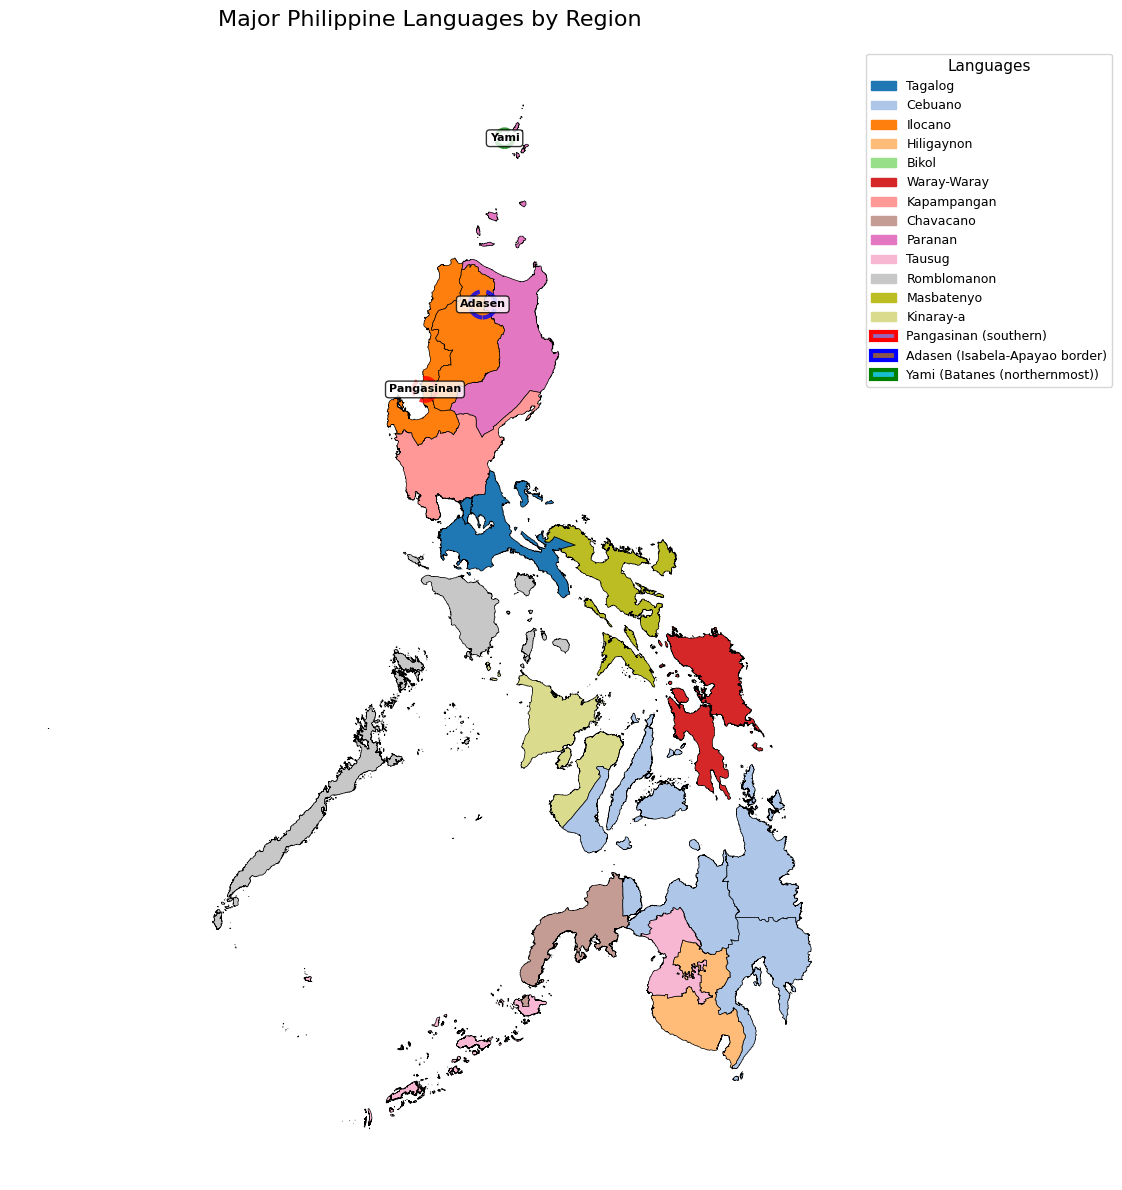

<Figure size 640x480 with 0 Axes>

In [3]:
# 1. Plot basic regions (no color)
# plm.plot_regions(is_colored=False, show=True)

# 2. Plot colored regions
# plm.plot_regions(is_colored=True, show=True)

# 3. Plot language map
# plm.plot_languages(show=True)

# 4. Save plots to files
# plm.plot_regions(is_colored=True, show=True, save_path="regions_colored.png")
plm.plot_languages(show=True, save_path="lingmap_out.png")